## Откроем файл с данными и изучим общую информацию

In [1]:
# импортируем библиотеки

import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [2]:
# читаем файл

data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##  Подготовка данных

### Приводим названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Изменение типов данных

Проверяем столбцы с рейтингами игр

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Переводим столбец с оценкой пользователей в числовой тип, заменяя значение tbd на nan так как не знаем как трактовать данное значение.

In [8]:
data['user_score'] =pd.to_numeric(data['user_score'], errors='coerce')

In [9]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце raitng мы nan переводим в значение unknown, чтобы знать стоколько таких значений и они отображались на графике столбца raitng.

In [12]:
data['rating'] = data['rating'].fillna('unknown')

In [13]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Изменить тип данных столбца с годом выхода игры на целочисленный для уменьшения памяти мы не можем, из-за пропусках в столбце, а заменить пропуски не представляется возможным, так как у каждый игры свой год выхода.

### Обработка пропусков

In [14]:
data.dropna(subset = ['name'],inplace = True)

Удаляем сточки с пропусками в столбце с названием игры, без названия сложно делать выводы об игре.

Остальные строчки содержат важную информацию и удалять их нет смысла.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Столбец с общими продажами

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
data['sales'] =data['na_sales'] +data['eu_sales'] +data['jp_sales']+ data['other_sales'] 

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

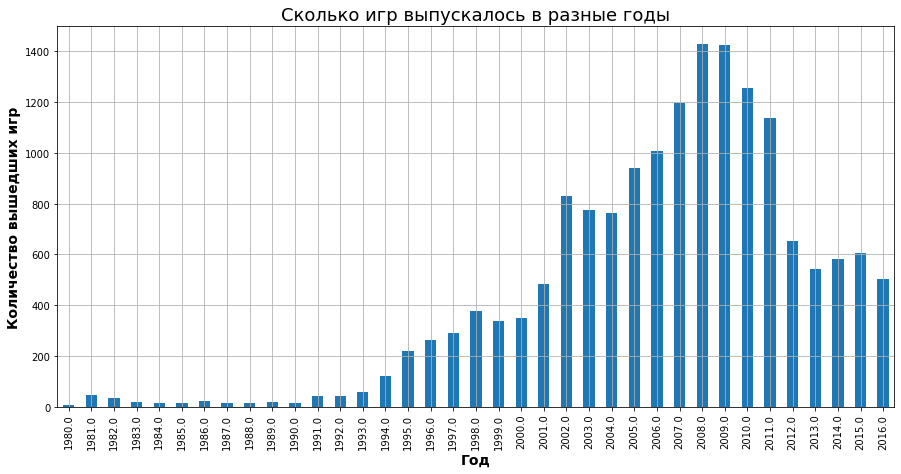

In [18]:
# Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

data.groupby('year_of_release')['name'].count().plot(kind="bar",figsize=(15,7),grid=True)
plt.title(label='Сколько игр выпускалось в разные годы',fontsize=18)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Количество вышедших игр", fontsize=14, fontweight="bold")
plt.show()

Думаю данные за период от 1980 до 1995 не важен, так как слишком мало игр выходило в это время.

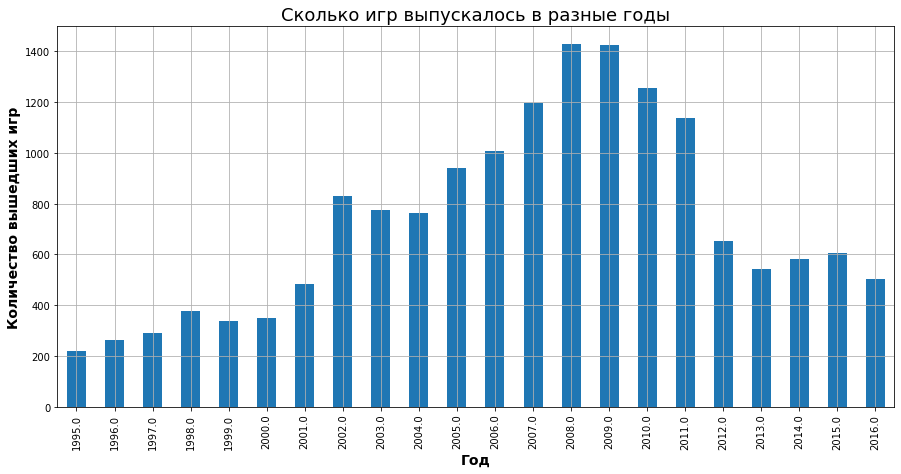

In [19]:
data=data.query('year_of_release>1994')
data.groupby('year_of_release')['name'].count().plot(kind="bar",figsize=(15,7),grid=True)
plt.title(label='Сколько игр выпускалось в разные годы',fontsize=18)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Количество вышедших игр", fontsize=14, fontweight="bold")
plt.show()

### Как менялись продажи по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
top_platform_sales = data.pivot_table(index='platform',values='sales', aggfunc='sum').sort_values(by='sales', ascending = False).head(7)
top_platform_sales =top_platform_sales.reset_index()
top_platform_sales

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,721.55
6,PS4,314.14


In [21]:
top_platform= pd.Series(top_platform_sales['platform'])


sum_year_sales =pd.DataFrame(data.groupby(['platform','year_of_release'])['sales'].sum())

sum_year_sales_top_platform = sum_year_sales.query('platform  in @top_platform').reset_index()

sum_year_sales_top_platform

,platform,year_of_release,sales
0,DS,2004.0,17.27
1,DS,2005.0,130.14
2,DS,2006.0,119.81
3,DS,2007.0,146.94
4,DS,2008.0,145.31
...,...,...,...
64,X360,2012.0,99.74
65,X360,2013.0,88.58
66,X360,2014.0,34.74
67,X360,2015.0,11.96


In [22]:
# выведем сроки жизни каждой платформы
sum_year_sales_top_platform.groupby('platform')['year_of_release'].max()- sum_year_sales_top_platform.groupby('platform')['year_of_release'].min()

platform
DS       9.0
PS       8.0
PS2     11.0
PS3     10.0
PS4      3.0
Wii     10.0
X360    11.0
Name: year_of_release, dtype: float64

In [23]:
# выведем среднее значение срока жизни платформы

print((sum_year_sales_top_platform.groupby('platform')['year_of_release'].max()- sum_year_sales_top_platform.groupby('platform')['year_of_release'].min()).mean())

8.857142857142858


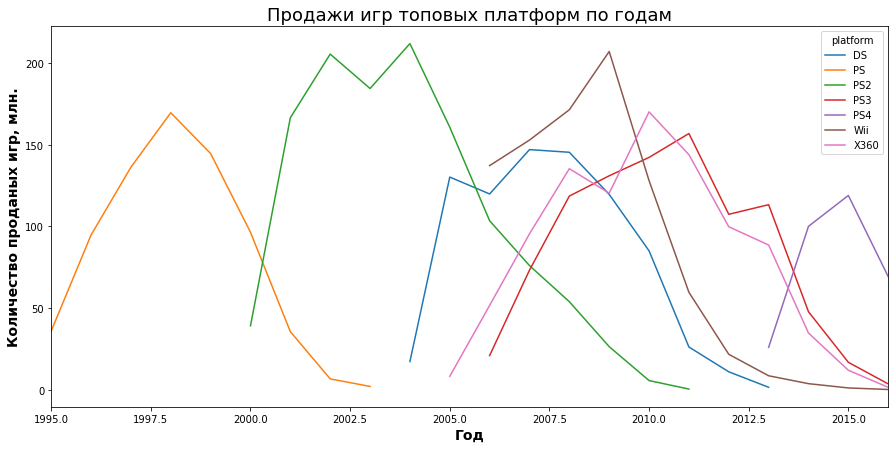

In [24]:
sum_year_sales_top_platform.pivot_table(index='platform' ,columns='year_of_release', values='sales').T.plot(figsize=(15,7))
plt.title(label='Продажи игр топовых платформ по годам',fontsize=18)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Количество проданых игр, млн.", fontsize=14, fontweight="bold")
plt.show()


Новые платформы появлются за характерный срок в 5 лет, после появления предыдущей версии.

Старые платформы изчезают спустя 9 лет.

### Потенициально прибыльные платформы

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Так как рынок игр динамичен, актуальный период выберем: с 2014 до 2016 год

Не будем учитывать в работе данные за предыдущие годы.

In [25]:
# оставляем данные за актуальный период

data_last3year=data.query('year_of_release>2013')
data_last3year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Топ 5 платформ за актуальный период

In [26]:
top_platform_sales_last3year = data_last3year.pivot_table(index='platform',values='sales', aggfunc='sum').sort_values(by='sales', ascending = False).head(5)
top_platform_sales_last3year =top_platform_sales_last3year.reset_index()
top_platform_sales_last3year

,platform,sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


In [27]:
top_platform_last3year =  pd.Series(top_platform_sales_last3year['platform'])

data_last3year_top_platform=data_last3year.query('platform in @top_platform_last3year')
data_last3year_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


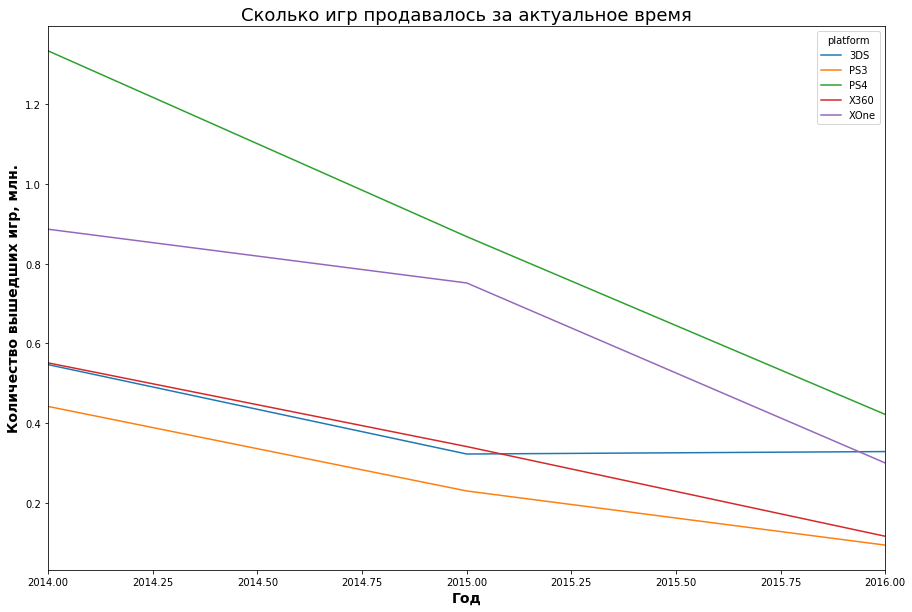

In [28]:
data_last3year_top_platform.pivot_table(index='platform' ,columns='year_of_release', values='sales').T.plot(figsize=(15,10))
plt.title(label='Сколько игр продавалось за актуальное время',fontsize=18)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Количество вышедших игр, млн.", fontsize=14, fontweight="bold")
plt.show()

Как мы видим на графике: лидирует по продажам платформа PS4, чуть ниже 3DS и XOne, PS3 и X360 на одинаково низком уровне продаж.  Однкако падают продажи у абсолютно всех топ платформ, кроме 3DS, у которой немного увеличились продажи в 2016 году в сравнении с предидущим. В связи с чем можно назвать платформу 3DS единственной потенциально прибыльной.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

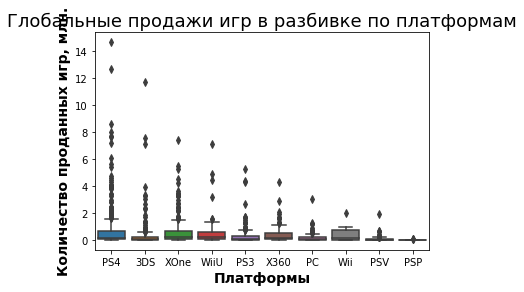

In [29]:
sns.boxplot(x='platform', y='sales', data=data_last3year) 
sns.set(rc={'figure.figsize':(15,7)})
plt.title(label='Глобальные продажи игр в разбивке по платформам',fontsize=18)
plt.xlabel("Платформы", fontsize=14, fontweight="bold")
plt.ylabel("Количество проданных игр, млн.", fontsize=14, fontweight="bold")
plt.show()

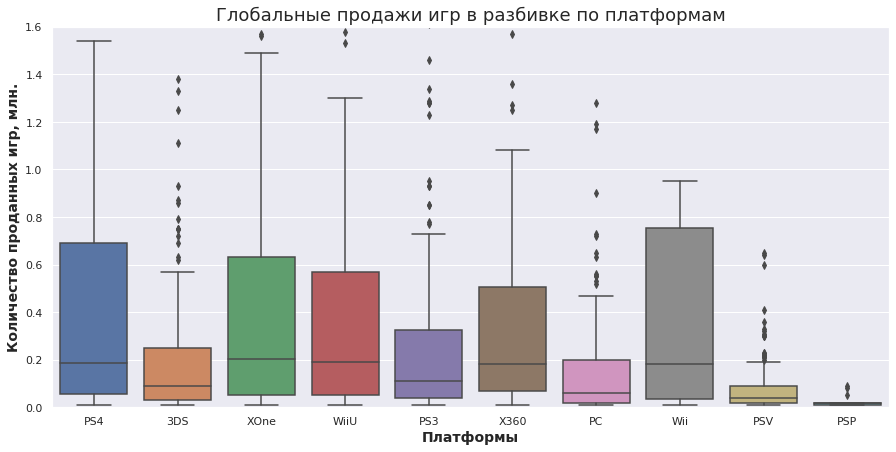

In [30]:
sns.boxplot(x='platform', y='sales', data=data_last3year) 
sns.set(rc={'figure.figsize':(15,7)})
plt.title(label='Глобальные продажи игр в разбивке по платформам',fontsize=18)
plt.xlabel("Платформы", fontsize=14, fontweight="bold")
plt.ylabel("Количество проданных игр, млн.", fontsize=14, fontweight="bold")
plt.ylim([0, 1.6])
plt.show()

Мы видим что выбросы есть на всех платформах, вероятно это самые популярные игры на этих платформах. 

Только 3 игры с продажами больше 10 млн., одна - у платформы 3DS(>11 млн.), 2 игры у PS4 (> 12 и >14 млн.)

"Ящики" у платформ в разном диапазоне, однако можно выделить 5 лидеров по медиане продаж игр: PS4, XOne, WiiU, X360, Wii.

У остальных платформ медиана значительно ниже. Выделяется очень низкий уровень продаж платформы PSP.

### Зависимость отзывов и продаж

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


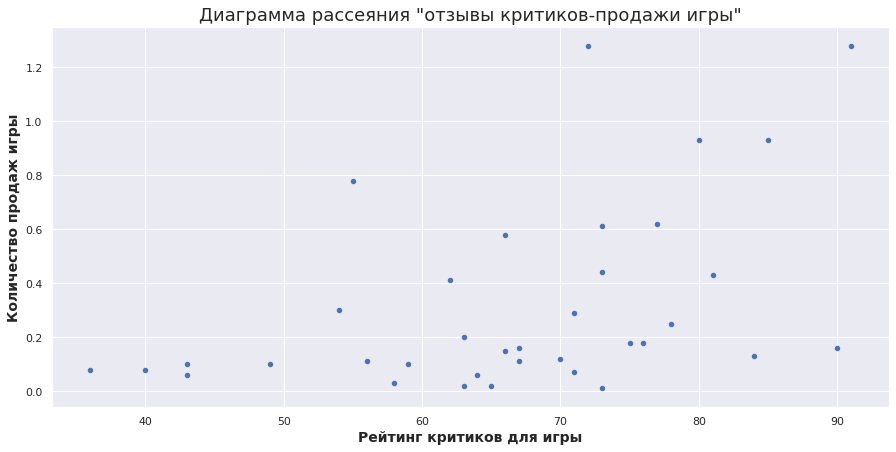

In [31]:
data_last3year.query('platform=="PS3"').plot(
    x='critic_score', y='sales', kind='scatter', grid=True
)
plt.title(label='Диаграмма рассеяния "отзывы критиков-продажи игры"',fontsize=18)
plt.xlabel("Рейтинг критиков для игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество продаж игры", fontsize=14, fontweight="bold")
plt.show()
warnings.filterwarnings("ignore")


In [32]:
print(data_last3year.query('platform=="PS3"')['critic_score'].corr(data_last3year.query('platform=="PS3"')['sales']))

0.44657460493190704


Корреляция в 0.44 говорит о наличии связи, однако не слишком сильной. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


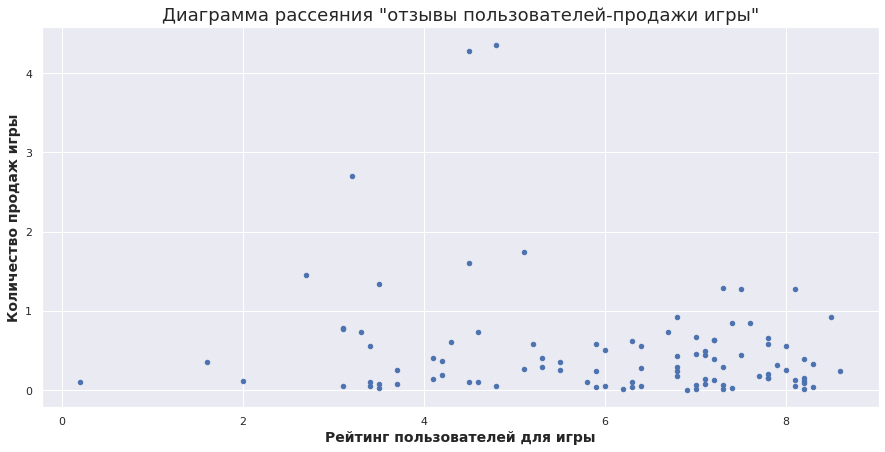

In [33]:
data_last3year.query('platform=="PS3"').plot(
    x='user_score', y='sales', kind='scatter', grid=True
)
plt.title(label='Диаграмма рассеяния "отзывы пользователей-продажи игры"',fontsize=18)
plt.xlabel("Рейтинг пользователей для игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество продаж игры", fontsize=14, fontweight="bold")
plt.show()

In [34]:
print(data_last3year.query('platform=="PS3"')['user_score'].corr(data_last3year.query('platform=="PS3"')['sales']))

-0.16676141347662118


Корреляция в -0.16 говорит почти о полном отсутствии связи между оценкой пользователей и уровнем продаж. Выходит, увеличение оценки пользователей не сопровождается прибавкой продаж игры.

Соотнесем выводы с продажами игр на других платформах.

In [35]:
platforms = pd.Series(data_last3year['platform'].unique())
platforms

0     PS4
1     3DS
2    XOne
3    WiiU
4     PS3
5    X360
6      PC
7     Wii
8     PSV
9     PSP
dtype: object

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


PS4
По рейтигу критиков
0.40266141068104083


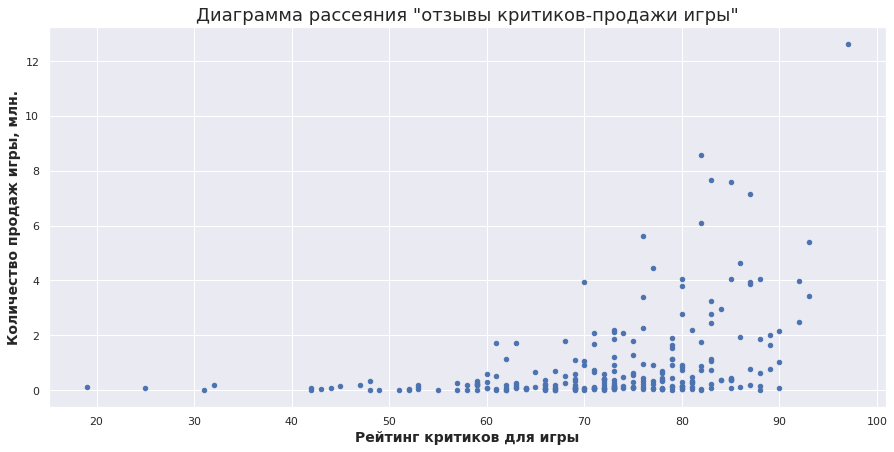

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.040131589472697356


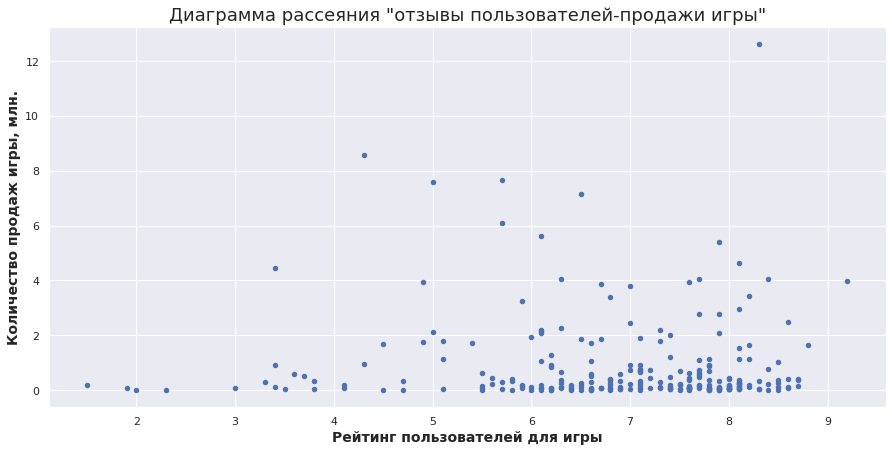

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



3DS
По рейтигу критиков
0.314117492869051


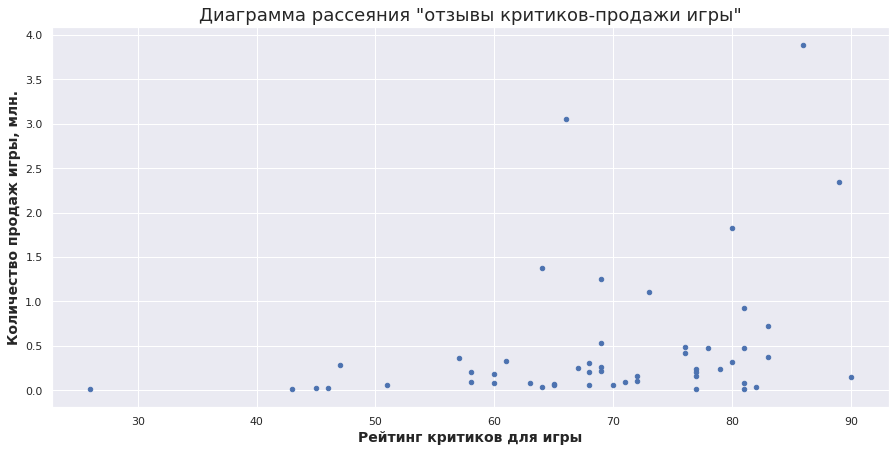

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
0.2151932718527028


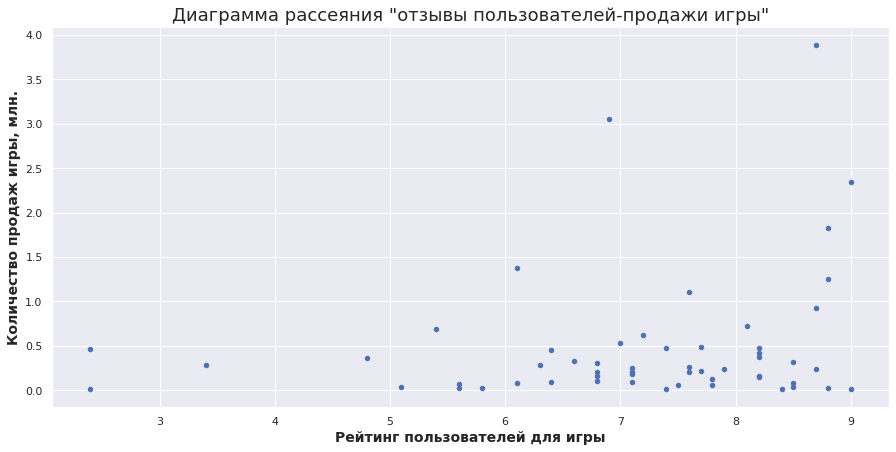

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



XOne
По рейтигу критиков
0.42867694370333226


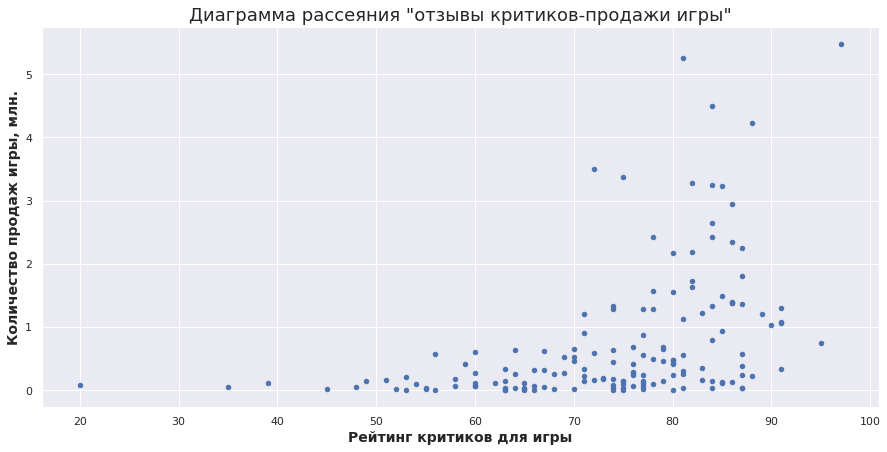

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.0703839280647581


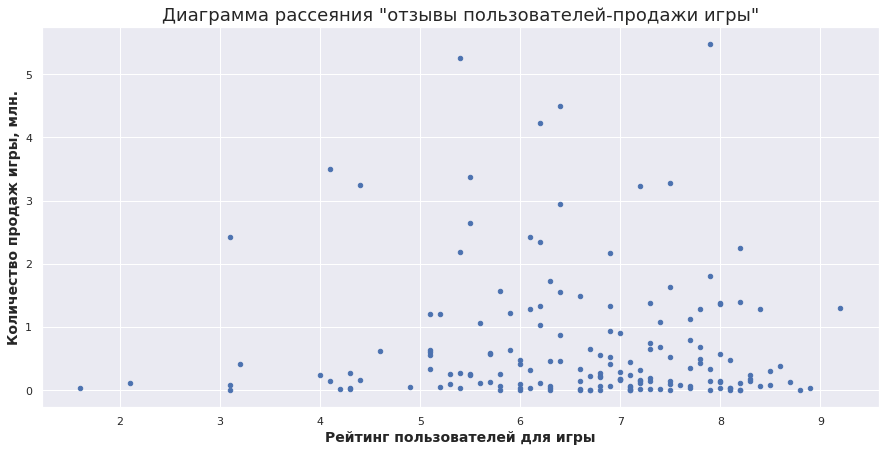

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



WiiU
По рейтигу критиков
0.370201412480884


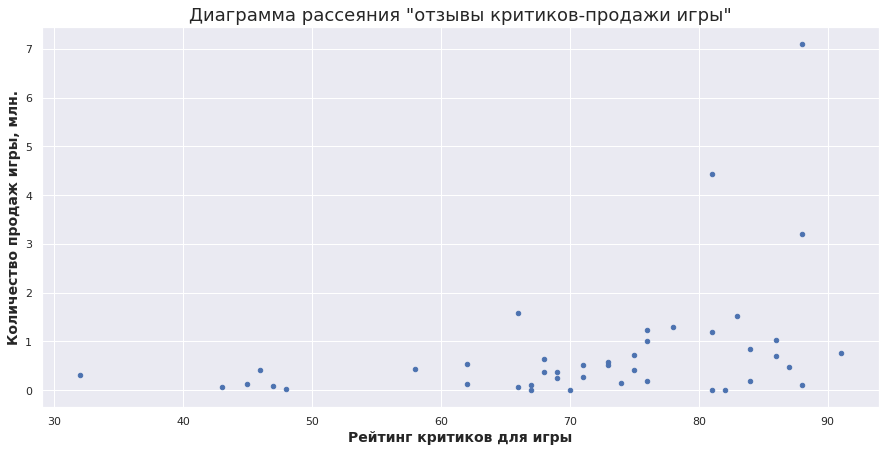

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
0.40792645792170773


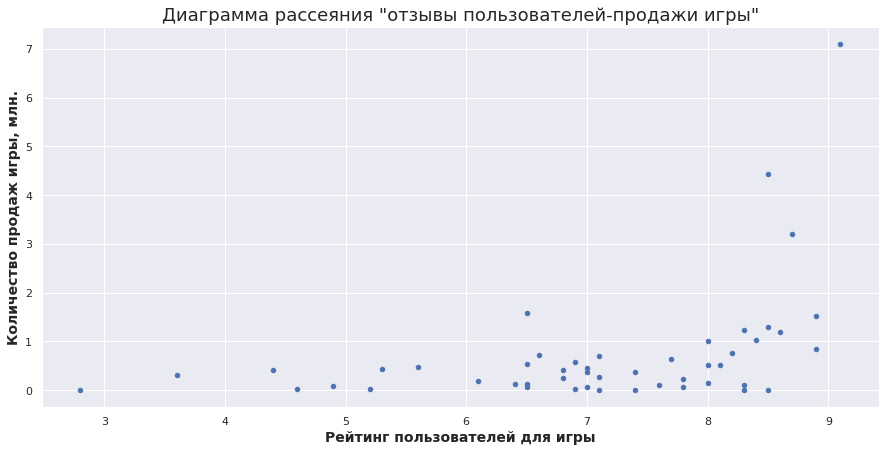

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



PS3
По рейтигу критиков
0.44657460493190704


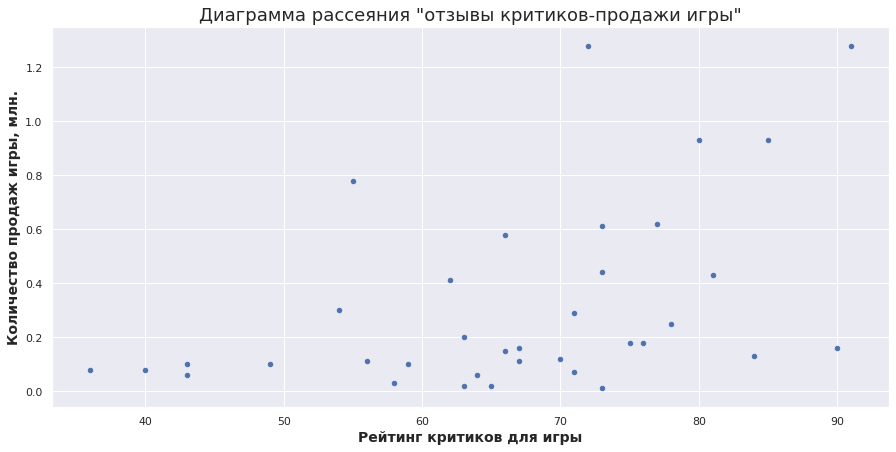

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.16676141347662118


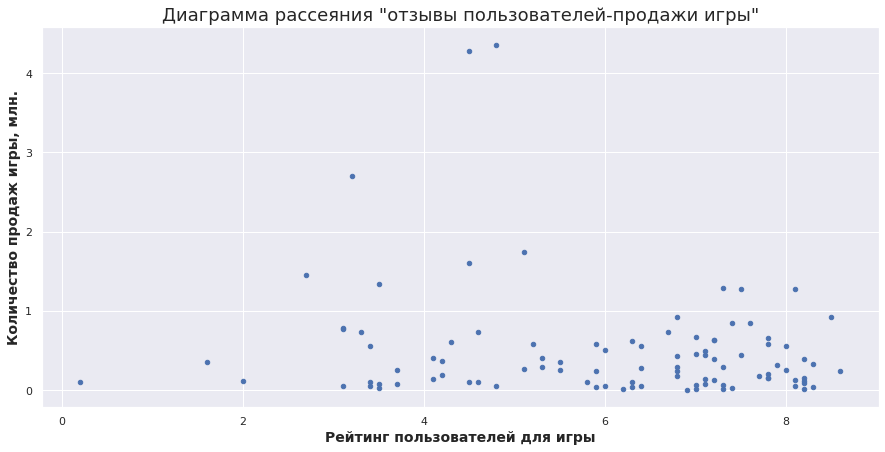

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



X360
По рейтигу критиков
0.5257228356581523


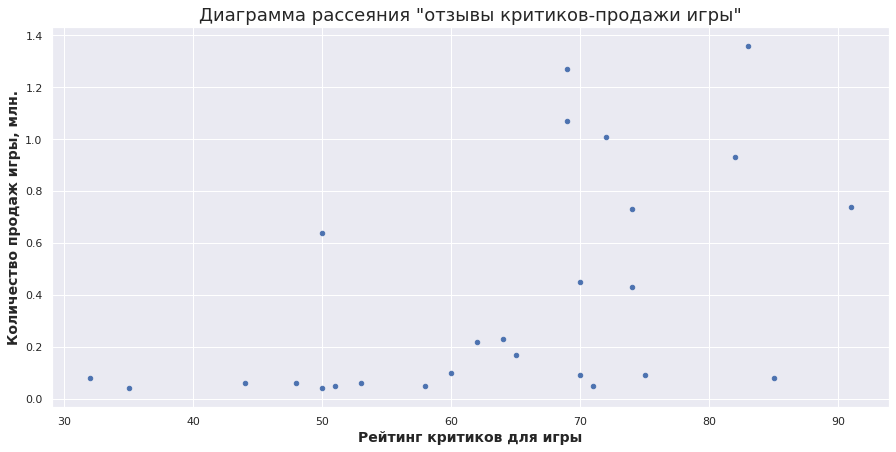

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.138444570945665


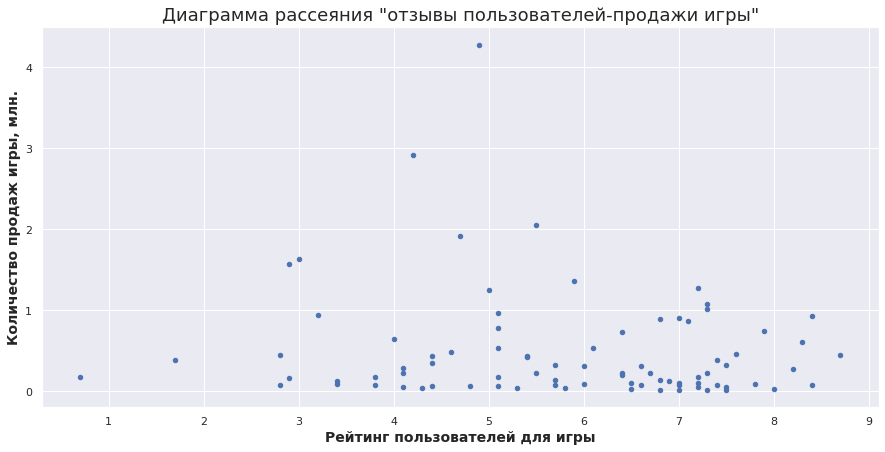

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



PC
По рейтигу критиков
0.17463413769350036


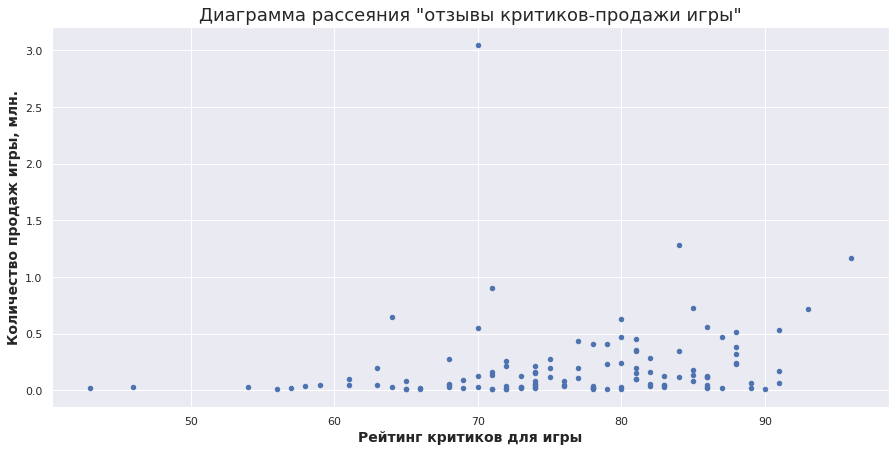

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.07159665703472451


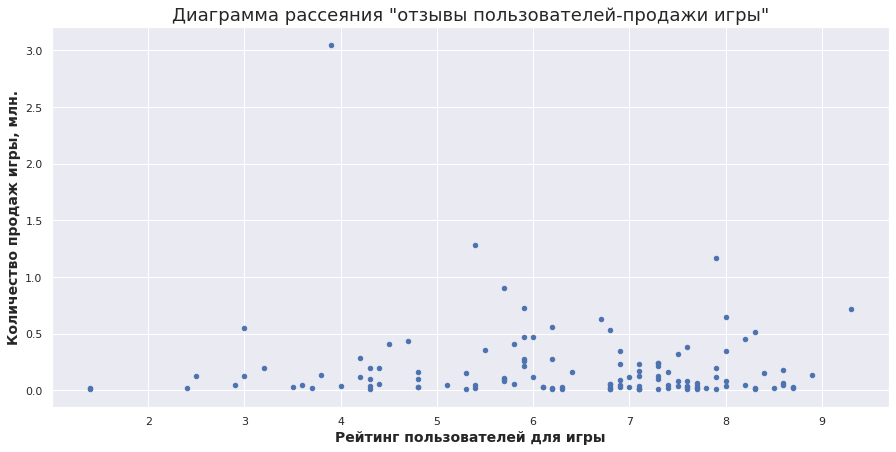

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Wii
По рейтигу критиков
nan


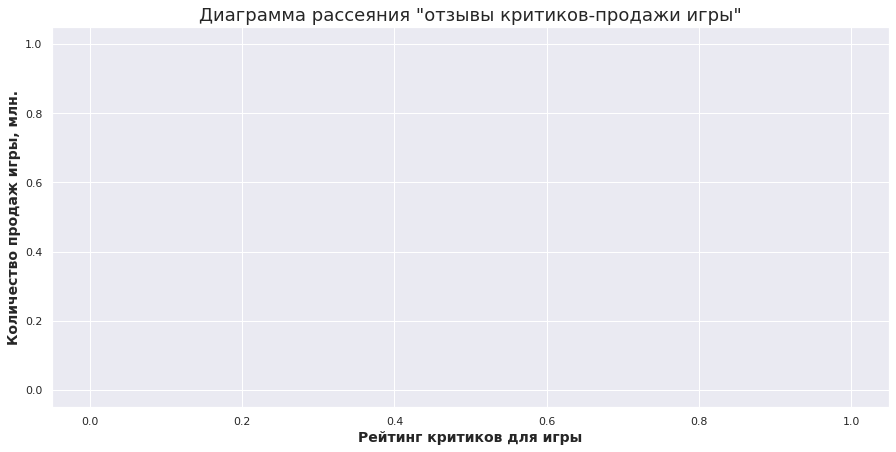

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
1.0


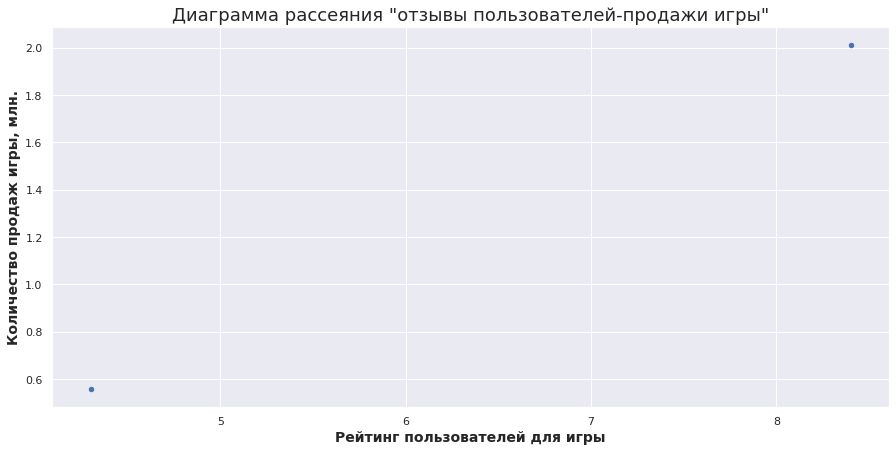

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



PSV
По рейтигу критиков
0.04266490657009526


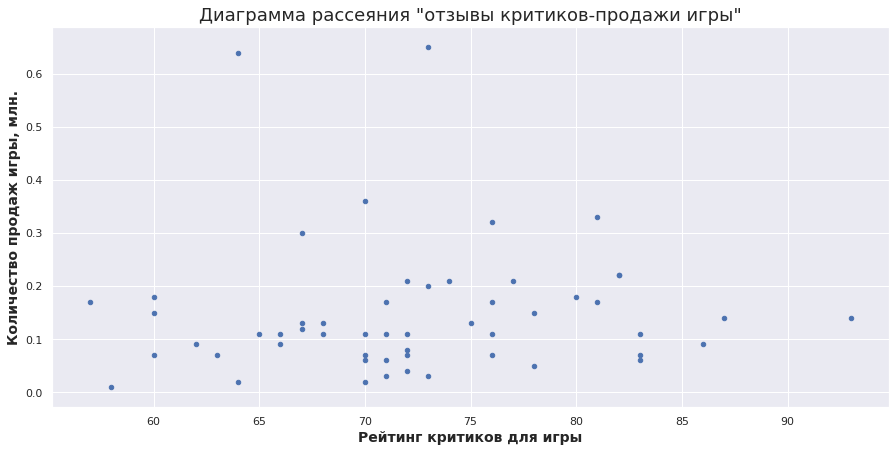

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
-0.16845504978064446


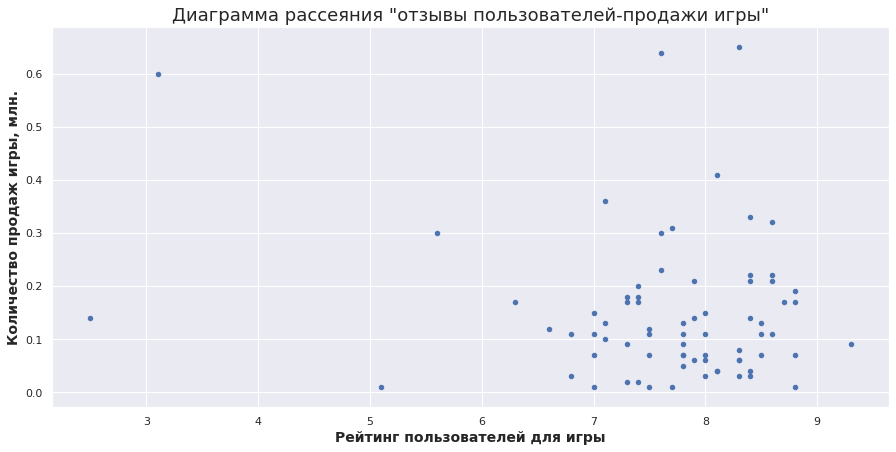

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



PSP
По рейтигу критиков
nan


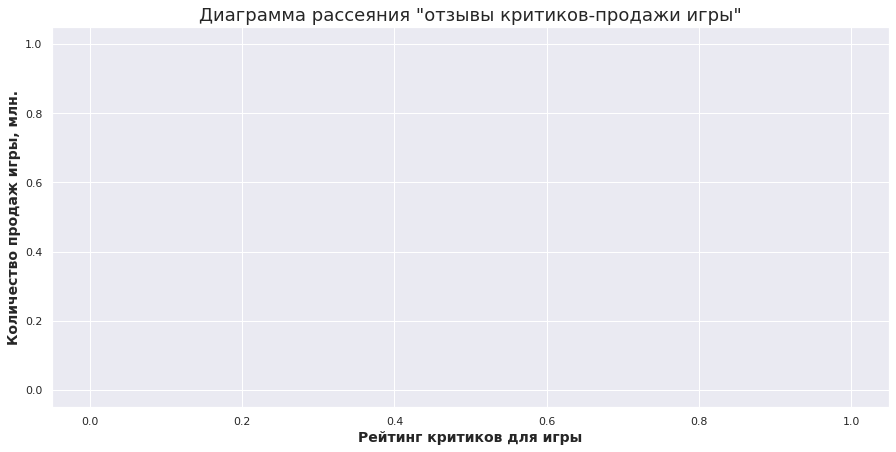

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


По рейтигу пользователей
nan


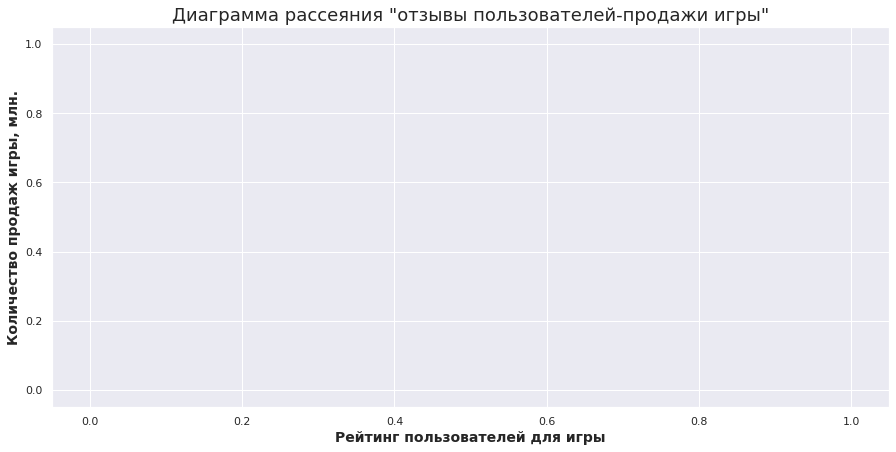

In [36]:
# пишем цыкл для вывода корреляций отзывов и продаж

for pl in platforms:
    
        print(pl)
        print('По рейтигу критиков')
        print(data_last3year.query('platform == @pl')['critic_score'].corr(data_last3year.query('platform == @pl')['sales']))
        data_last3year.query('platform==@pl').plot(
        x='critic_score', y='sales', kind='scatter', grid=True)
        plt.title(label='Диаграмма рассеяния "отзывы критиков-продажи игры"',fontsize=18)
        plt.xlabel("Рейтинг критиков для игры", fontsize=14, fontweight="bold")
        plt.ylabel("Количество продаж игры, млн.", fontsize=14, fontweight="bold")
        plt.show()
        
        print('По рейтигу пользователей')
        print(data_last3year.query('platform == @pl')['user_score'].corr(data_last3year.query('platform == @pl')['sales']))
        data_last3year.query('platform==@pl').plot(
        x='user_score', y='sales', kind='scatter', grid=True)
        plt.title(label='Диаграмма рассеяния "отзывы пользователей-продажи игры"',fontsize=18)
        plt.xlabel("Рейтинг пользователей для игры", fontsize=14, fontweight="bold")
        plt.ylabel("Количество продаж игры, млн.", fontsize=14, fontweight="bold")
        plt.show()
        
        print('')

Из платформ где достаточно отзывов на игры за актуальное время можно выделить следующие:

Мы видим у крупных платформ(X360(0.52),PS3(0.44),XOne(0.42),PS4(0.4),WiiU(0.37)) явную связь между рейтингом критиков и количеством продаж.

Явную связь между рейтингом пользователей и количеством продаж видно только у платформы WiiU - 0.4

Соотнесем выводы с продажами игр на всех платформах.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


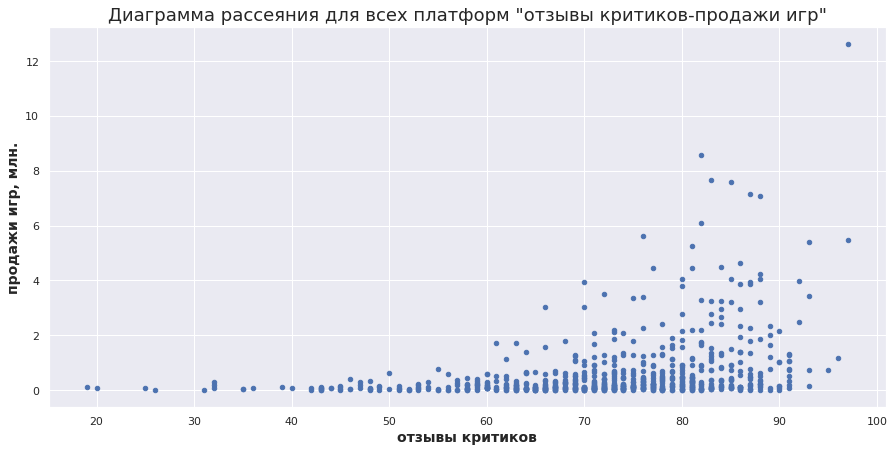

In [37]:
data_last3year.plot(
    x='critic_score', y='sales', kind='scatter', grid=True
)
plt.title(label='Диаграмма рассеяния для всех платформ "отзывы критиков-продажи игр"',fontsize=18)
plt.xlabel("отзывы критиков", fontsize=14, fontweight="bold")
plt.ylabel("продажи игр, млн.", fontsize=14, fontweight="bold")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


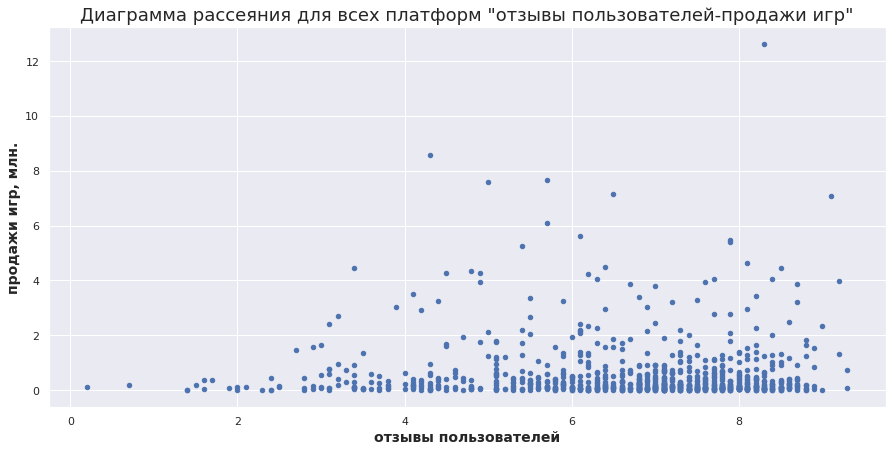

In [38]:
data_last3year.plot(
    x='user_score', y='sales', kind='scatter', grid=True
)
plt.title(label='Диаграмма рассеяния для всех платформ "отзывы пользователей-продажи игр"',fontsize=18)
plt.xlabel("отзывы пользователей", fontsize=14, fontweight="bold")
plt.ylabel("продажи игр, млн.", fontsize=14, fontweight="bold")
plt.show()

In [39]:
print(data_last3year['critic_score'].corr(data_last3year['sales']))

0.328105086966363


In [40]:
print(data_last3year['user_score'].corr(data_last3year['sales']))

-0.013070305002484562


Видим, что наши выводы на топовых по продажам платформа соотносятся с продажами игр на всех платформах. 

На менее популярных платформах все сложнее, вероятно потому что оценок от пользователей и критиков меньше для составления хорошей средней оценки.  Возможно пользователи меньше покупают игры этих платформ и оценивают только если игра им очень понравилась или очень не понравилась.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [41]:
game_genre=pd.DataFrame(data_last3year.groupby(['genre'])['name'].count())
genre_sales=pd.DataFrame(data_last3year.groupby(['genre'])['sales'].sum())


game_genre_sales = genre_sales.merge(game_genre,  on=['genre'])
game_genre_sales = game_genre_sales.sort_values(by='sales',ascending=False)
game_genre_sales

,sales,name
genre,,
Action,199.36,619
Shooter,170.94,128
Sports,109.48,161
Role-Playing,101.44,221
Misc,37.55,113
Fighting,28.22,60
Racing,27.52,69
Platform,18.09,38
Adventure,17.55,185


In [42]:
game_genre_sales['sales_for_game'] = game_genre_sales['sales']/game_genre_sales['name']
game_genre_sales =  game_genre_sales.sort_values(by='sales_for_game',ascending=False)
game_genre_sales

,sales,name,sales_for_game
genre,,,
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Platform,18.09,38,0.476053
Fighting,28.22,60,0.470333
Role-Playing,101.44,221,0.459005
Racing,27.52,69,0.398841
Misc,37.55,113,0.332301
Action,199.36,619,0.322068
Simulation,13.13,44,0.298409


In [43]:
game_genre_sale=pd.DataFrame(data_last3year.groupby(['genre'])['sales'].sum())
game_genre_sale = game_genre_sale.sort_values(by='sales',ascending=False)
game_genre_sale

,sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


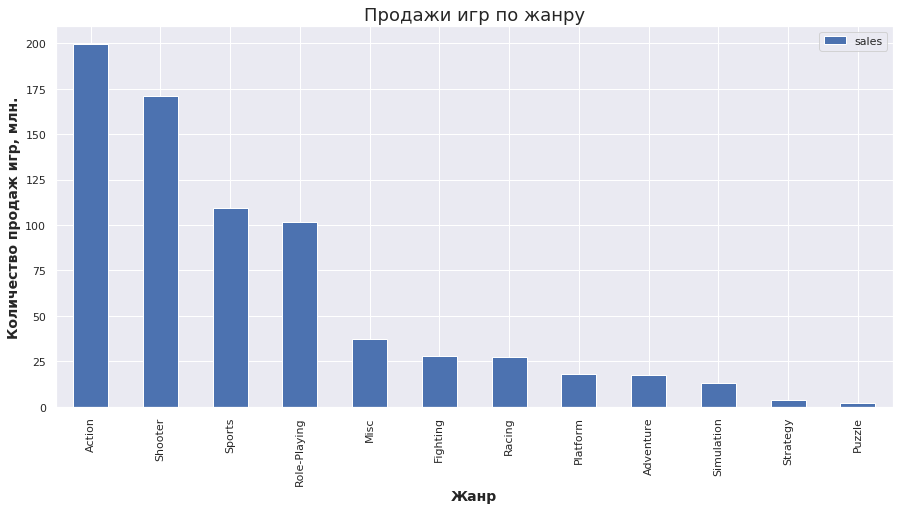

In [44]:
# график продаж игр по жанру

game_genre_sale.plot(kind="bar")
plt.title(label='Продажи игр по жанру',fontsize=18)
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("Количество продаж игр, млн.", fontsize=14, fontweight="bold")
plt.show()

Как мы видим самые прибыльные жанры игр это Action, Shooter, Role-Playing и Sports. Остальные жанры гораздо менее прибыльные. Можно отметить одинаковый уровень продаж жанров Role-Playing и Sports. Так же выделяется жанр Puzzle с самыми низкими продажами, а жанр Action выделяется самым высоким уровнем продаж.

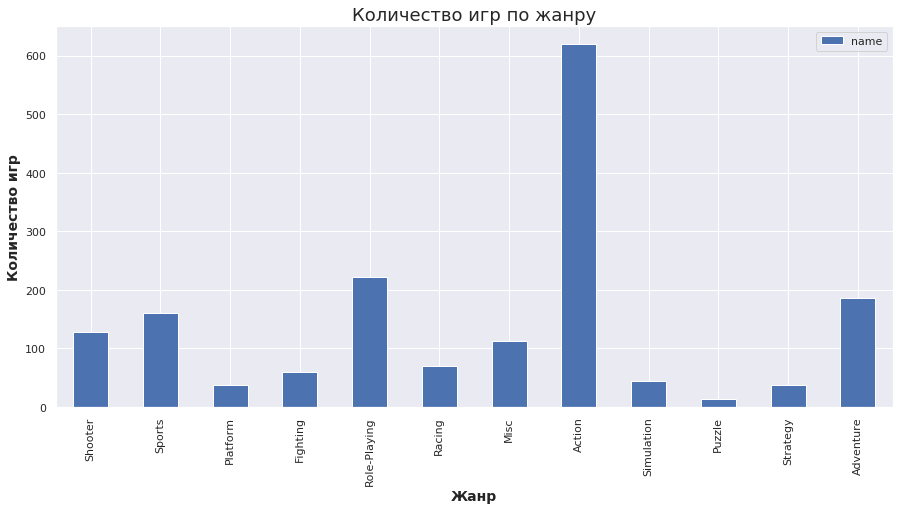

In [45]:
# график количества игр по жанру 

game_genre_sales.plot(kind="bar", y='name')
plt.title(label='Количество игр по жанру',fontsize=18)
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold")
plt.show()

Тут можно увидить как много игр жанра Action, в 3 раза больше игр жанра Role-Playing который на 2 месте, и как мало игр жанра Puzzle, Platform, Strategy и Simulation.

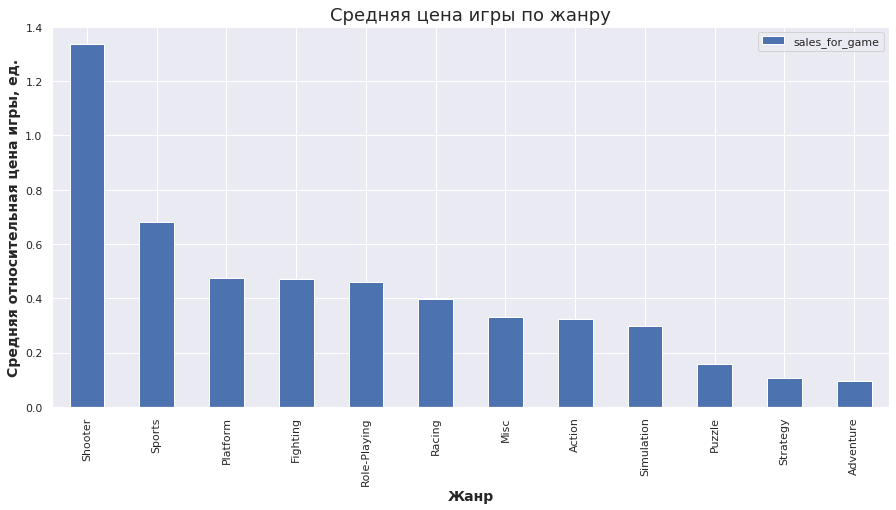

In [46]:
# график среней цены игры по жанру (дорогие - дешевые для потребителя)

game_genre_sales.plot(kind="bar", y='sales_for_game')
plt.title(label='Средняя цена игры по жанру',fontsize=18)
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("Средняя относительная цена игры, ед.", fontsize=14, fontweight="bold")
plt.show()

На этом графике мы видим что самые дорогие игры это игры жанра Shooter, гораздо дешевле игры жанра Sports (в 2 раза дешевле), хотя и немного дороже остальных. А самые дешевые жанры игр: Adventure, Strategy, Puzzle.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):


Самые популярные платформы (топ-5). Опишем различия в долях продаж.

Самые популярные жанры (топ-5). Поясним разницу.


Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы 

NA

In [47]:
data_last3year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [48]:
top5_na_last3year=pd.DataFrame(data_last3year.groupby(['platform'])['na_sales'].sum()).sort_values(by='na_sales',ascending=False).head(5)
top5_na_last3year= top5_na_last3year.reset_index()
top5_na_last3year

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


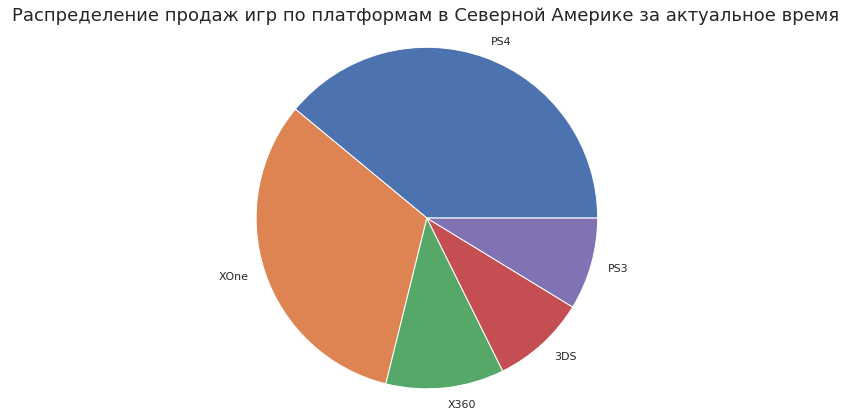

In [49]:
plt.pie(top5_na_last3year['na_sales'],labels=top5_na_last3year['platform'])
plt.axis('equal')
plt.title(label='Распределение продаж игр по платформам в Северной Америке за актуальное время',fontsize=18)
plt.show()

В Северной Америке популярнее всего PS4 и XOne, следом идут остальные: X360 и  по-ровну PS3 и 3DS.

EU

In [50]:
top5_eu_last3year=pd.DataFrame(data_last3year.groupby(['platform'])['eu_sales'].sum()).sort_values(by='eu_sales',ascending=False).head(5)
top5_eu_last3year =top5_eu_last3year.reset_index()
top5_eu_last3year

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


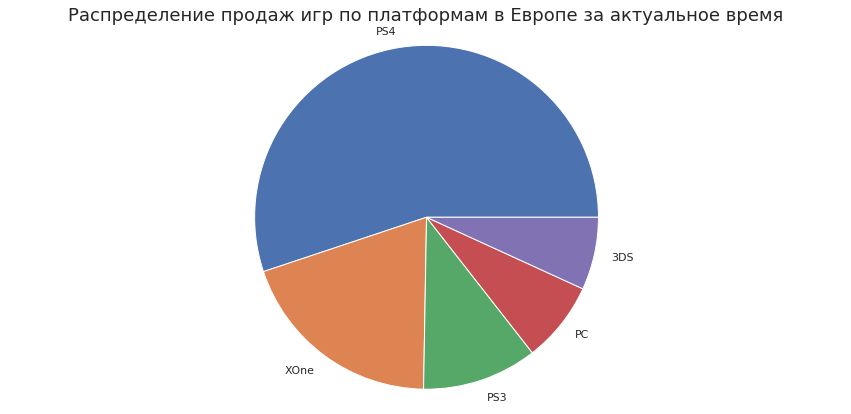

In [51]:
plt.pie(top5_eu_last3year['eu_sales'],labels=top5_eu_last3year['platform'])
plt.axis('equal')
plt.title(label='Распределение продаж игр по платформам в Европе за актуальное время',fontsize=18)
plt.show()

В Европе ситуация отличается: популярнее всего PS4 - больше половины от доли топ 5, гораздо меньше XOne и замыкают PS3, PC, 3DS.

JP

In [52]:
top5_jp_last3year=pd.DataFrame(data_last3year.groupby(['platform'])['jp_sales'].sum()).sort_values(by='jp_sales',ascending=False).head(5)
top5_jp_last3year =top5_jp_last3year.reset_index()
top5_jp_last3year

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


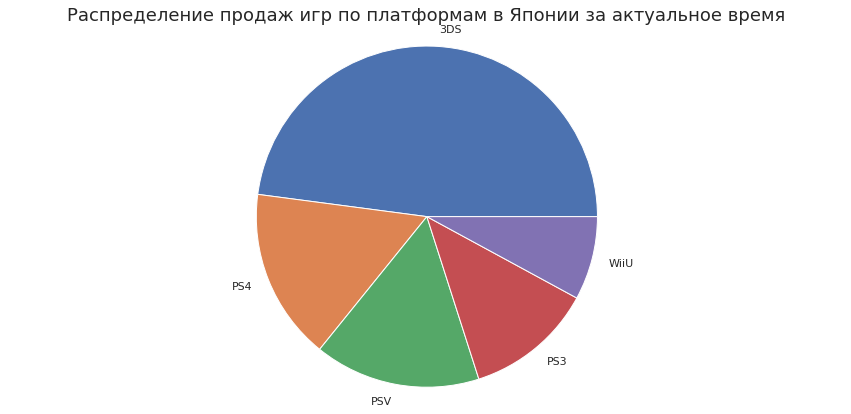

In [53]:
plt.pie(top5_jp_last3year['jp_sales'],labels=top5_jp_last3year['platform'])
plt.title(label='Распределение продаж игр по платформам в Японии за актуальное время',fontsize=18)
plt.axis('equal')
plt.show()

В Японии куда веселее: платформа 3DS занимает чуть меньше половины продаж среди топ 5 платформ, следом примерно поровну PS4, PSV, PS3 и замыкает WiiU с самыми низкими продажами.

### Самые популярные жанры

NA

In [54]:
top5_genre_na_last3year=pd.DataFrame(data_last3year.groupby(['genre'])['na_sales'].sum()).sort_values(by='na_sales',ascending=False).head(5)
top5_genre_na_last3year= top5_genre_na_last3year.reset_index()
top5_genre_na_last3year
#таблица с топ жанрами в Северной Америке

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [55]:
sum_top5_genre_na_last3year = top5_genre_na_last3year['na_sales'].sum()
fraction_top5_genre_na_last3year = pd.DataFrame.copy(top5_genre_na_last3year)
fraction_top5_genre_na_last3year['fraction_na'] =fraction_top5_genre_na_last3year['na_sales']/sum_top5_genre_na_last3year
fraction_top5_genre_na_last3year

,genre,na_sales,fraction_na
0,Shooter,79.02,0.320959
1,Action,72.53,0.294598
2,Sports,46.13,0.187368
3,Role-Playing,33.47,0.135946
4,Misc,15.05,0.061129


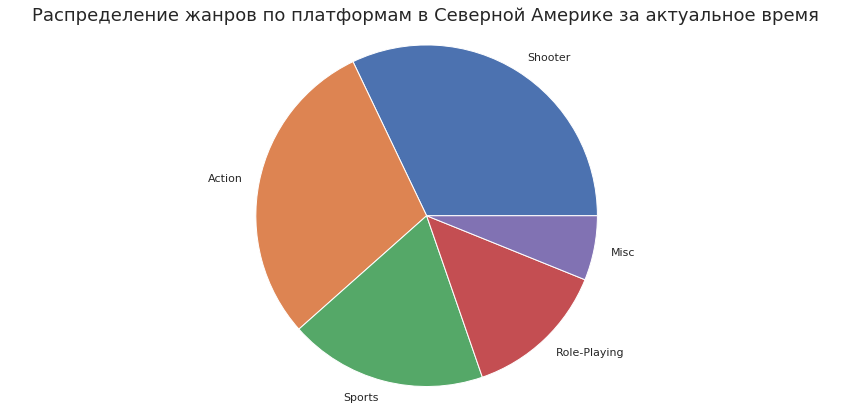

In [56]:
plt.pie(fraction_top5_genre_na_last3year['fraction_na'],labels=fraction_top5_genre_na_last3year['genre'])
plt.title(label='Распределение жанров по платформам в Северной Америке за актуальное время',fontsize=18)
plt.axis('equal')
plt.show()

EU

In [57]:
top5_genre_eu_last3year=pd.DataFrame(data_last3year.groupby(['genre'])['eu_sales'].sum()).sort_values(by='eu_sales',ascending=False).head(5)
top5_genre_eu_last3year= top5_genre_eu_last3year.reset_index()
top5_genre_eu_last3year
#таблица с топ жанрами в Европе 

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [58]:
sum_top5_genre_eu_last3year = top5_genre_eu_last3year['eu_sales'].sum()
fraction_top5_genre_eu_last3year = pd.DataFrame.copy(top5_genre_eu_last3year)
fraction_top5_genre_eu_last3year['fraction_eu'] =fraction_top5_genre_eu_last3year['eu_sales']/sum_top5_genre_eu_last3year
fraction_top5_genre_eu_last3year

,genre,eu_sales,fraction_eu
0,Action,74.68,0.327214
1,Shooter,65.52,0.287079
2,Sports,45.73,0.200368
3,Role-Playing,28.17,0.123428
4,Racing,14.13,0.061911


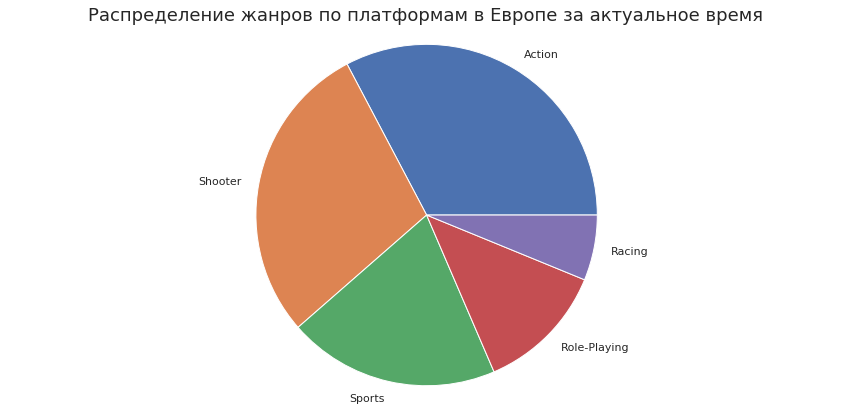

In [59]:
plt.pie(fraction_top5_genre_eu_last3year['fraction_eu'],labels=fraction_top5_genre_eu_last3year['genre'])
plt.title(label='Распределение жанров по платформам в Европе за актуальное время',fontsize=18)
plt.axis('equal')
plt.show()

JP

In [60]:
top5_genre_jp_last3year=pd.DataFrame(data_last3year.groupby(['genre'])['jp_sales'].sum()).sort_values(by='jp_sales',ascending=False).head(5)
top5_genre_jp_last3year= top5_genre_jp_last3year.reset_index()
top5_genre_jp_last3year
#таблица с топ жанрами в Японии 

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


In [61]:
sum_top5_genre_jp_last3year = top5_genre_jp_last3year['jp_sales'].sum()
fraction_top5_genre_jp_last3year = pd.DataFrame.copy(top5_genre_jp_last3year)
fraction_top5_genre_jp_last3year['fraction_jp'] =fraction_top5_genre_jp_last3year['jp_sales']/sum_top5_genre_jp_last3year
fraction_top5_genre_jp_last3year

,genre,jp_sales,fraction_jp
0,Role-Playing,31.16,0.401598
1,Action,29.58,0.381235
2,Fighting,6.37,0.082098
3,Misc,5.61,0.072303
4,Shooter,4.87,0.062766


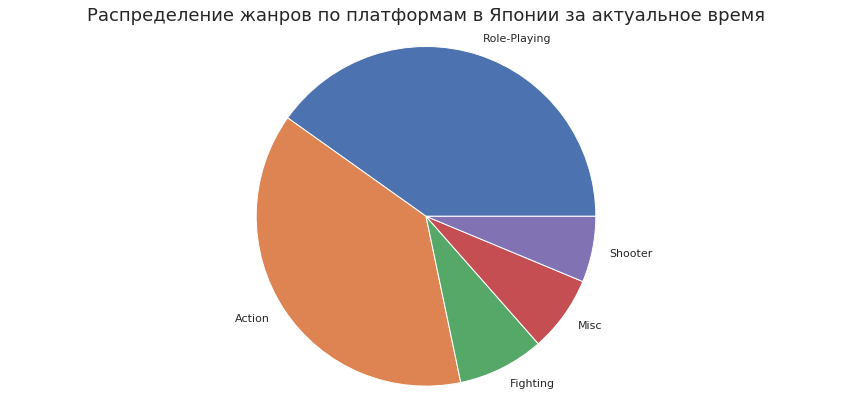

In [62]:
plt.pie(fraction_top5_genre_jp_last3year['fraction_jp'],labels=fraction_top5_genre_jp_last3year['genre'])
plt.title(label='Распределение жанров по платформам в Японии за актуальное время',fontsize=18)
plt.axis('equal')
plt.show()

Все вместе

In [63]:
data_frames = [top5_genre_jp_last3year, top5_genre_eu_last3year, top5_genre_na_last3year]
top5_genre_last3year = reduce(lambda  left,right: pd.merge(left,right,on=['genre'],how='outer'), data_frames)
top5_genre_last3year
#сджойним наши таблицы с топ жанрами по регионам

,genre,jp_sales,eu_sales,na_sales
0,Role-Playing,31.16,28.17,33.47
1,Action,29.58,74.68,72.53
2,Fighting,6.37,NaN,NaN
3,Misc,5.61,NaN,15.05
4,Shooter,4.87,65.52,79.02
5,Sports,NaN,45.73,46.13
6,Racing,NaN,14.13,NaN


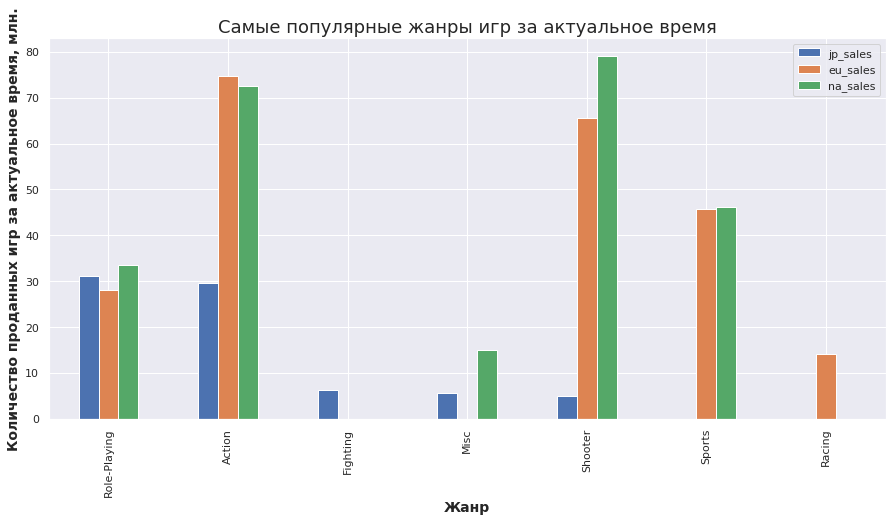

In [64]:
# постоим наглядный график

top5_genre_last3year.plot(kind="bar", x='genre')
plt.title(label='Самые популярные жанры игр за актуальное время',fontsize=18)
plt.xlabel("Жанр", fontsize=14, fontweight="bold")
plt.ylabel("Количество проданных игр за актуальное время, млн.", fontsize=14, fontweight="bold")
plt.show()

На этом граике мы видим различия продаж топ 5 жанров в 3 регионах. Выделяется что япония не похожа на европу и америку: только у них в топ 5 попали жанры Fighting. В свою очередь в только в Европе в топ 5 есть жанр Racing. Так же видно что в японии меньше всего продаж.  Примерно одинаково по количеству продаж во всех трех регионах любят жанр Role-Playing, правда у японии этот жанр стоит на первом месте, а у остальных двух регионов аж на 4.

Краткий вывод можно сделать такой: евопейский и северо-американский регион очень похожи по топ жанрам, чего нельзя сказать про японию, она выделяется не только жанрами но и низким уровнем продаж.

### Влияние рейтинга ESRB

E - Для всех возрастов.

E10+ - Для детей старше 10 лет.

T - для подростков 13-17 лет.

M - для пользователей старше 17 лет.

unknown - игры без рейтинга

NA

In [65]:
# таблица с распределением игр по возрастному рейтингу в Северной Америке

rating_na_last3year=pd.DataFrame(data_last3year.groupby(['rating'])['na_sales'].sum()).sort_values(by='na_sales',ascending=False).head(5)
rating_na_last3year= rating_na_last3year.reset_index()
sum_rating_na_last3year = top5_genre_na_last3year['na_sales'].sum()
rating_na_last3year['fraction_na'] =rating_na_last3year['na_sales']/sum_rating_na_last3year
rating_na_last3year

,rating,na_sales,fraction_na
0,M,96.42,0.391633
1,unknown,64.72,0.262876
2,E,50.74,0.206093
3,T,38.95,0.158205
4,E10+,33.23,0.134972


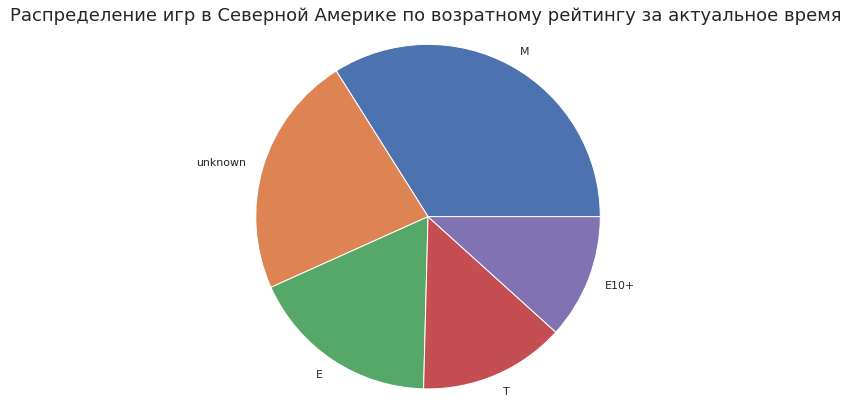

In [66]:
plt.pie(rating_na_last3year['na_sales'],labels=rating_na_last3year['rating'])
plt.axis('equal')
plt.title(label='Распределение игр в Северной Америке по возратному рейтингу за актуальное время',fontsize=18)
plt.show()

В Северной Америке больше всего продаж игр с возрастным рейтингом 17+, и меньше всего с рейтингом 13+.

Игры без возрастного рейтинга занимают 2 место по продажам.

EU

In [67]:
# таблица с распределением игр по возрастному рейтингу в Европе 

rating_eu_last3year=pd.DataFrame(data_last3year.groupby(['rating'])['eu_sales'].sum()).sort_values(by='eu_sales',ascending=False).head(5)
rating_eu_last3year= rating_eu_last3year.reset_index()
sum_rating_eu_last3year = top5_genre_eu_last3year['eu_sales'].sum()
rating_eu_last3year['fraction_eu'] =rating_eu_last3year['eu_sales']/sum_rating_eu_last3year
rating_eu_last3year

,rating,eu_sales,fraction_eu
0,M,93.44,0.409412
1,unknown,58.95,0.258292
2,E,58.06,0.254392
3,T,34.07,0.149279
4,E10+,26.16,0.114621


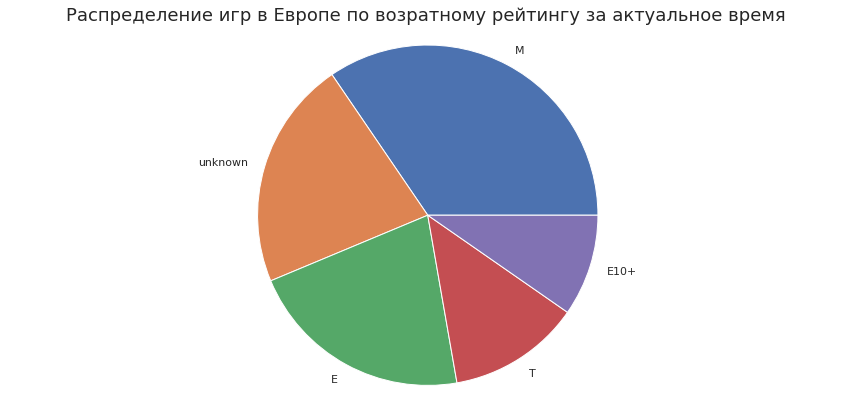

In [68]:
plt.pie(rating_eu_last3year['eu_sales'],labels=rating_eu_last3year['rating'])
plt.axis('equal')
plt.title(label='Распределение игр в Европе по возратному рейтингу за актуальное время',fontsize=18)
plt.show()

В Европе такое же распределение игр по рейтинги как и в Северной Америке: больше всего продаж игр с возрастным рейтингом 17+, и меньше всего с рейтингом 13+; рейтинги Е и Е10+ на 3 и 4 местах.

Отличие толко в большей доле продаж игр с рейтингом Е.

Игры без возрастного рейтинга так же занимают 2 место по продажам.

JP

In [69]:
#таблица с распределением игр по возрастному рейтингу в Японии 

rating_jp_last3year=pd.DataFrame(data_last3year.groupby(['rating'])['jp_sales'].sum()).sort_values(by='jp_sales',ascending=False).head(5)
rating_jp_last3year= rating_jp_last3year.reset_index()
sum_rating_jp_last3year = top5_genre_jp_last3year['jp_sales'].sum()
rating_jp_last3year['fraction_jp'] =rating_jp_last3year['jp_sales']/sum_rating_jp_last3year
rating_jp_last3year

,rating,jp_sales,fraction_jp
0,unknown,56.90,0.733342
1,T,14.78,0.190488
2,E,8.94,0.115221
3,M,8.01,0.103235
4,E10+,4.46,0.057482


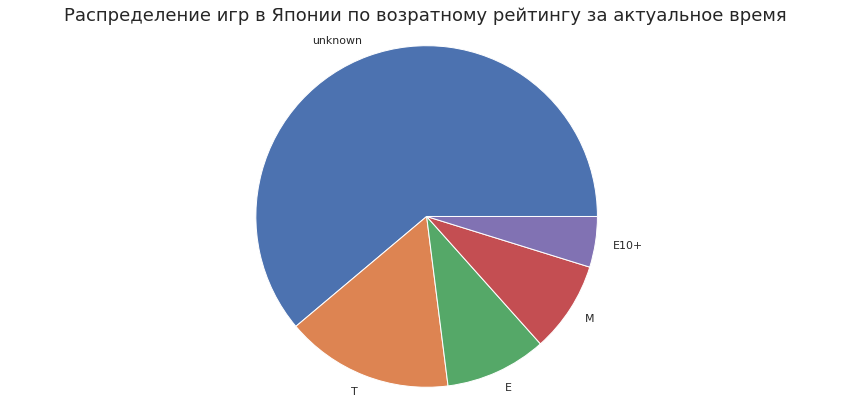

In [70]:
plt.pie(rating_jp_last3year['jp_sales'],labels=rating_jp_last3year['rating'])
plt.axis('equal')
plt.title(label='Распределение игр в Японии по возратному рейтингу за актуальное время',fontsize=18)
plt.show()

В Японии картина по-интересней: больше половины игр из топ 5 это игры без возрастного рейтинга, игры с рейтингом "для подростков" на втором месте.

## Проверка гипотез

Проверим 2 гипотезы:

Гипотеза первая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза вторая: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза первая

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [71]:
user_score_platform=pd.DataFrame(data_last3year.groupby(['platform','name'])['user_score'].mean())
user_score_platform=user_score_platform.dropna()
user_score_platform
#Создаем тоблицу со пользовательскими рейтингами для платформ

user_score
platform name                                                          
3DS      7th Dragon III Code: VFD                                   8.2
         Adventure Time: The Secret of the Nameless Kingdom         5.6
         Animal Crossing: Happy Home Designer                       6.9
         Azure Striker Gunvolt                                      8.4
         Bravely Second: End Layer                                  7.4
...                                                                 ...
XOne     Wolfenstein: The New Order                                 7.8
         Wolfenstein: The Old Blood                                 8.0
         Worms: WMD                                                 8.1
         XCOM 2                                                     8.1
         Zombie Army Trilogy                                        7.2

[888 rows x 1 columns]

In [72]:
user_score_XOne=user_score_platform.query('platform=="XOne"')
user_score_XOne
#создаем таблицу с пользовательскими отзывами на игры платформы Xbox One

user_score
platform name                                         
XOne     7 Days to Die                             5.2
         Agatha Christie's The ABC Murders         7.5
         Alien: Isolation                          7.8
         Arslan: The Warriors of Legend            5.8
         Assassin's Creed Chronicles               6.8
...                                                ...
         Wolfenstein: The New Order                7.8
         Wolfenstein: The Old Blood                8.0
         Worms: WMD                                8.1
         XCOM 2                                    8.1
         Zombie Army Trilogy                       7.2

[165 rows x 1 columns]

Создали таблицу с пользовательскими отзывами на игры платформы Xbox One

In [73]:
variance_user_score_XOne = np.var(user_score_XOne['user_score'], ddof=1)
print('{:.2f}'.format(variance_user_score_XOne))
#дисперсия по платформе XOne

1.89


In [74]:
user_score_PC=user_score_platform.query('platform=="PC"')
user_score_PC
#создаем таблицу с пользовательскими отзывами на игры платформы PS3 и уменьшаем ее до размера такой же таблицы для платформы Xbox One

user_score
platform name                                              
PC       Act of Aggression                              7.1
         Agatha Christie: The ABC Murders               8.5
         Alien: Isolation                               8.4
         Anno 2205                                      5.9
         Assassin's Creed Syndicate                     5.9
...                                                     ...
         Wolfenstein: The New Order                     8.2
         Wolfenstein: The Old Blood                     7.6
         World of Warcraft: Legion                      7.5
         World of Warcraft: Warlords of Draenor         5.9
         XCOM 2                                         7.1

[122 rows x 1 columns]

Создали таблицу с пользовательскими отзывами на игры платформы PC

In [75]:
variance_user_score_PC = np.var(user_score_PC['user_score'], ddof=1)
print('{:.2f}'.format(variance_user_score_PC))
#дисперсия по платформе PC

2.90


Нулевая гипотеза предполагает что "ничего не изменилось", а значит нулевая и альтернативаная гипотезы будут звучать так:

H0: cредние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются

H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются

Статистический метод: st.ttest_ind

Пороговый уровень статистической значимости(alpha) = 0.05



In [76]:
#проверим нулевую гипотезу
print('cредний польз. рейтинг XOne: ', user_score_XOne.mean())
print('cредний польз. рейтинг PC: ', user_score_PC.mean()) #среднее по обоим платформам

alpha =0.05 #критический уровень статистической значимости задаем 5%, стандартное значение

results =st.ttest_ind(user_score_XOne,user_score_PC)  #проведем тест и посчитаем p-значение

print('p-значение:', results.pvalue[0])   #выведим на экран полученное p-значение

if results.pvalue < alpha:          # сравним p-значение с заданным критическим уровнем стат. значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредний польз. рейтинг XOne:  user_score    6.594545
dtype: float64
cредний польз. рейтинг PC:  user_score    6.298361
dtype: float64
p-значение: 0.10450507919348608
Не получилось отвергнуть нулевую гипотезу


Как мы видим, не получилось отвергнуть нулевую гипотезу о том что cредние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются. А значит пользовательские рейтинги Xbox One и PC существенно не отличаются. 

### Гипотеза вторая

Гипотеза вторая: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [77]:
user_score_genre=pd.DataFrame(data_last3year.groupby(['genre','name'])['user_score'].mean())
user_score_genre=user_score_genre.dropna()
user_score_genre
#Создаем тоблицу с пользовательскими рейтингами по жанрам

user_score
genre    name                                                          
Action   7 Days to Die                                         5.550000
         Adventure Time: The Secret of the Nameless Kingdom    6.550000
         Aegis of Earth: Protonovus Assault                    8.050000
         Anima - Gate of Memories                              7.900000
         Arslan: The Warriors of Legend                        6.200000
...                                                                 ...
Strategy Stellaris                                             8.000000
         Total War: Attila                                     7.300000
         Total War: WARHAMMER                                  7.300000
         War for the Overworld                                 7.700000
         XCOM 2                                                7.733333

[429 rows x 1 columns]

In [78]:
user_score_Action=user_score_genre.query('genre=="Action"')
user_score_Action
#Создаем тоблицу с пользовательскими рейтингами по жанру Action и уменьшаем до размера таблицы с жанром Sports

user_score
genre  name                                                          
Action 7 Days to Die                                         5.550000
       Adventure Time: The Secret of the Nameless Kingdom    6.550000
       Aegis of Earth: Protonovus Assault                    8.050000
       Anima - Gate of Memories                              7.900000
       Arslan: The Warriors of Legend                        6.200000
...                                                               ...
       Wolfenstein: The Old Blood                            7.866667
       World of Warcraft: Warlords of Draenor                5.900000
       Worms: WMD                                            7.850000
       Yaiba: Ninja Gaiden Z                                 4.900000
       inFAMOUS: Second Son                                  7.900000

[130 rows x 1 columns]

In [79]:
variance_user_score_Action = np.var(user_score_Action['user_score'], ddof=1)
print('{:.2f}'.format(variance_user_score_Action))
#дисперсия по платформе XOne

1.88


Создали таблицу с пользовательскими отзывами на игры жанра Action

In [80]:
user_score_Sports=user_score_genre.query('genre=="Sports"')
user_score_Sports
#Создаем тоблицу с пользовательскими рейтингами по жанру Sports

user_score
genre  name                                       
Sports 2014 FIFA World Cup Brazil         4.350000
       Dead or Alive Xtreme 3: Fortune    7.800000
       Dino Dini's Kick Off Revival       4.500000
       Don Bradman Cricket 14             7.150000
       EA Sports UFC                      6.200000
       EA Sports UFC 2                    6.100000
       FIFA 15                            4.225000
       FIFA 16                            3.840000
       FIFA 17                            3.940000
       Handball 16                        3.000000
       Kinect Sports Rivals               5.100000
       MLB 14: The Show                   7.166667
       MLB 15: The Show                   8.266667
       MX vs. ATV Supercross Encore       4.100000
       Madden NFL 15                      5.175000
       Madden NFL 16                      5.050000
       Madden NFL 17                      2.925000
       Mario Golf: World Tour             8.200000
       Mario Tennis Ultra Smash           5.300000
       Mark McMorris Infinite Air         6.550000
       NASCAR '15                         3.800000
       NBA 2K15                           4.950000
       NBA 2K16                           5.280000
       NBA 2K17                           4.920000
       NBA Live 15                        6.200000
       NBA Live 16                        5.850000
       NHL 15                             2.800000
       NHL 16                             5.750000
       NHL 17                             4.900000
       Pro Cycling Manager 2016           4.800000
       Pro Evolution Soccer 2015          6.980000
       Pro Evolution Soccer 2016          6.360000
       Pro Evolution Soccer 2017          6.220000
       Rocket League                      8.400000
       Rugby 15                           3.250000
       Rugby Challenge 3                  6.700000
       Rugby World Cup 2015               3.900000
       The Golf Club                      5.850000
       Tony Hawk's Pro Skater 5           2.375000
       Tour de France 2014                5.100000
       UEFA Euro 2016                     6.600000
       WWE 2K15                           4.475000
       WWE 2K16                           6.125000
       WWE 2K17                           5.500000
       Wii Sports Club                    7.000000

In [81]:
variance_user_score_Sports = np.var(user_score_Sports['user_score'], ddof=1)
print('{:.2f}'.format(variance_user_score_Sports))
#дисперсия по платформе XOne

2.27


Создали таблицу с пользовательскими отзывами на игры жанра Sports

Нулевая гипотеза предполагает что "ничего не изменилось", а значит нулевая и альтернативаная гипотезы будут звучать так:

H0: cредние пользовательские рейтинги игр жанра Action и Sports НЕ отличаются

H1: средние пользовательские рейтинги игр жанра Action и Sports отличаются

Статистический метод: st.ttest_ind

Пороговый уровень статистической значимости(alpha) = 0.05


In [82]:
# проверим нулевую гипотезу

print('cредний польз. жанра Action:', user_score_Action.mean())
print('cредний польз. жанра Sports:', user_score_Sports.mean()) # среднее по обоим жанрам

alpha =0.05 # критический уровень статистической значимости задаем 5%, стандартное значение

results =st.ttest_ind(user_score_Action,user_score_Sports)  # проведем тест и посчитаем p-значение

print('p-значение:', results.pvalue[0])   # выведим на экран полученное p-значение

if results.pvalue < alpha:          # сравним p-значение с заданным критическим уровнем стат. значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредний польз. жанра Action: user_score    6.823536
dtype: float64
cредний польз. жанра Sports: user_score    5.400519
dtype: float64
p-значение: 2.4239326586247104e-08
Отвергаем нулевую гипотезу


Как мы видим p-value слишком мало что бы не отвергнуть нулевую гипотезу. Значит средние пользовательские рейтинги игр жанра Action и Sports отличаются.

Только исходя из проверки гипотезы мы не можем сказать, что больше - только что выручка отличается. Однако посчитав средние пользовательские рейтинги для обоих датасетов, с уверенностью можем сказать: больше рейтинг у жанра Action.

## Общий вывод

Мы проанализировали данные и можем сделать следующие выводы: 

### Срок жизни платформы

Новые платформы появлются за характерный срок в 5 лет, после появления предыдущей версии. Старые платформы изчезают спустя 9 лет.

### Лидеры продаж

Лидируют по продажам платформы PS4, чуть ниже 3DS и XOne. 

Однкако падают продажи почти у абсолютно всех платформ.

Потенциально прибыльные это 3DS  и PS4.

### Зависимость отзывов и продаж

На топовых по продажам игр платформах (X360, PS3, XOne, PS4, WiiU) есть зависимость между отзывами критиков и продажами игр.

Явная связь между рейтингом пользователей и продажами есть только у WiiU.

### Распределение игр по жанрам

Больше всего игр жанра Action, их в 3 раза больше игр жанра Role-Playing, который на 2 месте; меньше всего игр жанра Puzzle, Platform, Strategy и Simulation.

Самые прибыльные жанры это Action, Shooter, Role-Playing и Sports.

Самые дорогие игры это игры жанра Shooter, гораздо дешевле игры жанра Sports (в 2 раза дешевле), хотя и немного дороже остальных. А самые дешевые жанры игр: Adventure, Strategy, Puzzle.

### Самые популярные платформы

За актуальный период:

В Северной Америке популярнее всего PS4, следом идут XOne и X360.

В Европе ситуация отличается: популярнее всего PS4, следом идут XOne и PS3.

В Японии куда веселее: платформа 3DS занимает почти половину продаж среди топ 5 платформ, следом идут PS4 и PSV

### Самые популярные жанры

В Северной Америке популярнее всего жанры Shooter, Action, Sports, Playing.

В Европе популярнее всего жанры Action, Shooter, Sports.

В Японии популярнее всего жанры Role-Playing, Action.

Выделяется что япония не похожа на европу и америку: только у них в топ 5 попали жанры Fighting. В свою очередь в только в Европе в топ 5 есть жанр Racing. Так же видно что в японии меньше всего продаж.  Примерно одинаково по количеству продаж во всех трех регионах любят жанр Role-Playing, правда у японии этот жанр стоит на первом месте, а у остальных двух регионов аж на 4.

Вывод можно сделать такой: евопейский и северо-американский регион очень похожи по топ жанрам, чего нельзя сказать про японию.

### Влияние возростного рейтинга

В Северной Америке больше всего продаж игр с возрастным рейтингом 17+, и меньше всего с рейтингом 13+.

Игры без возрастного рейтинга занимают 2 место по продажам.

В Европе такое же распределение игр по рейтинги как и в Северной Америке: больше всего продаж игр с возрастным рейтингом 17+, и меньше всего с рейтингом 13+; рейтинги Е и Е10+ на 3 и 4 местах.

Отличие толко в большей доле продаж игр с рейтингом Е.

Игры без возрастного рейтинга так же занимают 2 место по продажам.

В Японии картина по-интересней: больше половины игр из топ 5 это игры без возрастного рейтинга, игры с рейтингом "для подростков" на втором месте.

### Проверка гипотез

Гипотера первая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: cредние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются

H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются

Не получилось отвергнуть нулевую гипотезу о том что cредние пользовательские рейтинги платформ Xbox One и PC НЕ отличаются. А значит пользовательские рейтинги Xbox One и PC существенно не отличаются.

Гипотера вторая: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: cредние пользовательские рейтинги игр жанра Action и Sports НЕ отличаются

H1: средние пользовательские рейтинги игр жанра Action и Sports отличаются

Отвергаем нулевую гипотезу. Значит средние пользовательские рейтинги игр жанра Action и Sports отличаются.

Только исходя из проверки гипотезы мы не можем сказать, что больше - только что выручка отличается. Однако посчитав средние пользовательские рейтинги для обоих датасетов, с уверенностью можем сказать: больше рейтинг у жанра Action.